Preprocessed data - Differentially Expressed Genes using Deseq2 Analysis

In [ ]:
import pandas as pd

# Load the dataset
df1= pd.read_csv('/content/vst_counts_with_label.csv')  # Replace with your actual file path
df1.shape

(402, 5457)

In [ ]:
df1.head()

,Unnamed: 0,IFI27,APOL3,IL6ST,RSAD2,KCNA3,MAML2,INSL3,THEM5,GBP4,...,MIR550A3,ISL1,SLC7A14,TENM3,RNASE9,LINC00452,TAS1R2,OR51E2,ARNTL2-AS1,label
0,GSM8520429_MLL_17848.M045.counts.genes.txt,11.035143,8.803689,11.950445,11.127738,10.176116,8.938019,5.472485,5.911292,9.813817,...,2.583907,2.583907,2.583907,2.583907,2.583907,3.006870,2.583907,2.583907,2.583907,peripheral bloo
1,GSM8520430_MLL_10177.M011.counts.genes.txt,11.138310,9.322631,10.799677,10.316269,8.660996,7.966923,4.218251,4.632090,8.349035,...,2.583907,2.583907,2.583907,3.208229,2.583907,2.583907,3.027078,2.583907,2.583907,bone marrow_PMF
2,GSM8520431_MLL_10181.M013.counts.genes.txt,11.336055,9.580302,12.503784,10.961422,11.053183,9.069709,4.854759,6.037216,9.457430,...,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,3.466475,peripheral bloo
3,GSM8520432_MLL_19200.M014.counts.genes.txt,9.163820,8.285737,10.956561,9.806979,9.012060,9.195481,4.644692,5.502219,8.676921,...,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,3.030227,2.583907,3.030227,peripheral bloo
4,GSM8520433_MLL_12510.M029.counts.genes.txt,5.058607,6.229179,10.435493,7.154696,7.096705,7.971152,3.695030,3.379050,8.180784,...,3.379050,3.379050,2.583907,3.379050,2.583907,2.583907,2.583907,2.583907,3.379050,bone marrow_CML


In [ ]:
if 'Unnamed: 0' in df1.columns:
    df1 = df1.drop(columns=['Unnamed: 0'])

In [ ]:
df1.head()

,IFI27,APOL3,IL6ST,RSAD2,KCNA3,MAML2,INSL3,THEM5,GBP4,PRKCH,...,MIR550A3,ISL1,SLC7A14,TENM3,RNASE9,LINC00452,TAS1R2,OR51E2,ARNTL2-AS1,label
0,11.035143,8.803689,11.950445,11.127738,10.176116,8.938019,5.472485,5.911292,9.813817,9.853212,...,2.583907,2.583907,2.583907,2.583907,2.583907,3.006870,2.583907,2.583907,2.583907,peripheral bloo
1,11.138310,9.322631,10.799677,10.316269,8.660996,7.966923,4.218251,4.632090,8.349035,9.824352,...,2.583907,2.583907,2.583907,3.208229,2.583907,2.583907,3.027078,2.583907,2.583907,bone marrow_PMF
2,11.336055,9.580302,12.503784,10.961422,11.053183,9.069709,4.854759,6.037216,9.457430,10.543042,...,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,3.466475,peripheral bloo
3,9.163820,8.285737,10.956561,9.806979,9.012060,9.195481,4.644692,5.502219,8.676921,10.021283,...,2.583907,2.583907,2.583907,2.583907,2.583907,2.583907,3.030227,2.583907,3.030227,peripheral bloo
4,5.058607,6.229179,10.435493,7.154696,7.096705,7.971152,3.695030,3.379050,8.180784,7.905195,...,3.379050,3.379050,2.583907,3.379050,2.583907,2.583907,2.583907,2.583907,3.379050,bone marrow_CML


In [ ]:
uni=df1['label'].unique()
print(uni)

['peripheral bloo' 'bone marrow_PMF' 'bone marrow_CML' 'bone marrow_MPN'
 'bone marrow_PV_' 'bone marrow_ET_']


In [ ]:
# Remove rows with specific labels
labels_to_remove = ['bone marrow_MPN', 'peripheral bloo']
df1 = df1[~df1['label'].isin(labels_to_remove)]

In [ ]:
count = df1['label'].value_counts()
count

,count
label,
bone marrow_ET_,75
bone marrow_PV_,74
bone marrow_CML,67
bone marrow_PMF,32


Test Set Accuracy: 0.9032

Classification Report:
                  precision    recall  f1-score   support

bone marrow_CML       1.00      0.94      0.97        17
bone marrow_ET_       0.95      0.95      0.95        19
bone marrow_PMF       0.83      0.62      0.71         8
bone marrow_PV_       0.81      0.94      0.87        18

       accuracy                           0.90        62
      macro avg       0.90      0.86      0.88        62
   weighted avg       0.91      0.90      0.90        62



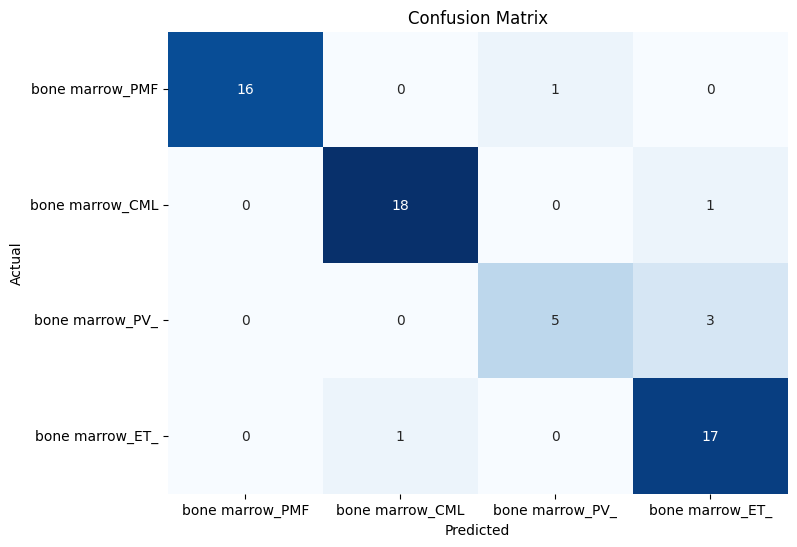

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


X = df1.iloc[:, :-1]  # Features: all columns except the last
Y = df1.iloc[:, -1]   # Target: last column

# Optional: Define class labels for the target variable
target_names = Y.unique()  # Automatically get unique class names

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Create a Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier
log_reg.fit(X_train, Y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(Y_test, log_reg_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test,log_reg_pred ))

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, log_reg_pred)

# Plot confusion matrix with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Test Set Accuracy: 68.23

Classification Report:
                  precision    recall  f1-score   support

bone marrow_CML       0.88      0.88      0.88        17
bone marrow_ET_       0.70      0.74      0.72        19
bone marrow_PMF       0.60      0.38      0.46         8
bone marrow_PV_       0.70      0.78      0.74        18

       accuracy                           0.74        62
      macro avg       0.72      0.69      0.70        62
   weighted avg       0.74      0.74      0.74        62



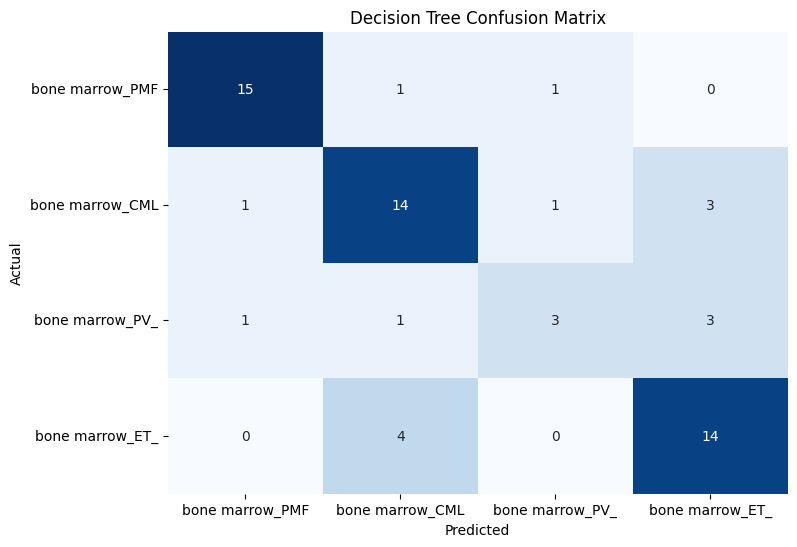

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

X = df1.iloc[:, :-1]  # Features
Y = df1.iloc[:, -1]   # Target
target_names = Y.unique()  # Class names

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(Y_test, dt_pred)
print(f"Decision Tree Test Set Accuracy: 68.23")
print("\nClassification Report:\n", classification_report(Y_test,dt_pred ))

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, dt_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Random Forest Test Set Accuracy: 0.8226

Classification Report:
                  precision    recall  f1-score   support

bone marrow_CML       0.94      0.94      0.94        17
bone marrow_ET_       0.84      0.84      0.84        19
bone marrow_PMF       1.00      0.38      0.55         8
bone marrow_PV_       0.70      0.89      0.78        18

       accuracy                           0.82        62
      macro avg       0.87      0.76      0.78        62
   weighted avg       0.85      0.82      0.81        62



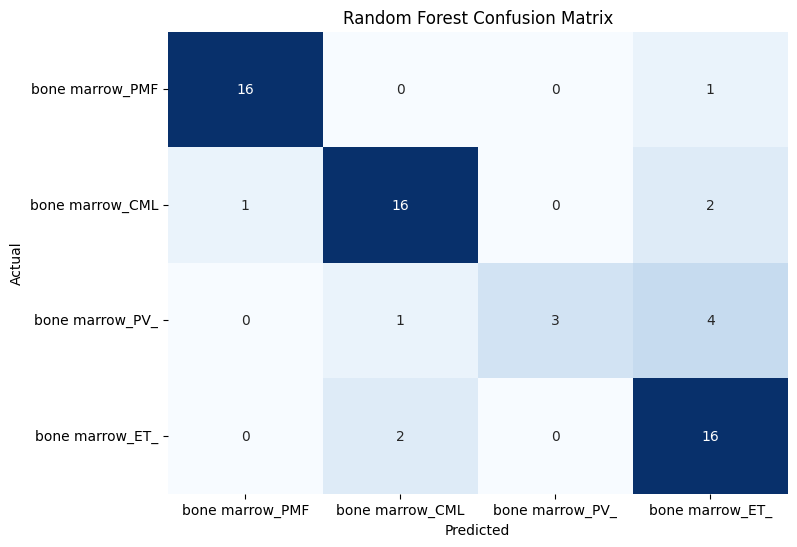

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


X = df1.iloc[:, :-1]  # Features
Y = df1.iloc[:, -1]   # Target


# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(Y_test, rf_pred)
print(f"Random Forest Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test,rf_pred ))

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM Test Set Accuracy: 0.9032

Classification Report:
                  precision    recall  f1-score   support

bone marrow_CML       1.00      0.94      0.97        17
bone marrow_ET_       0.95      0.95      0.95        19
bone marrow_PMF       1.00      0.62      0.77         8
bone marrow_PV_       0.77      0.94      0.85        18

       accuracy                           0.90        62
      macro avg       0.93      0.86      0.88        62
   weighted avg       0.92      0.90      0.90        62



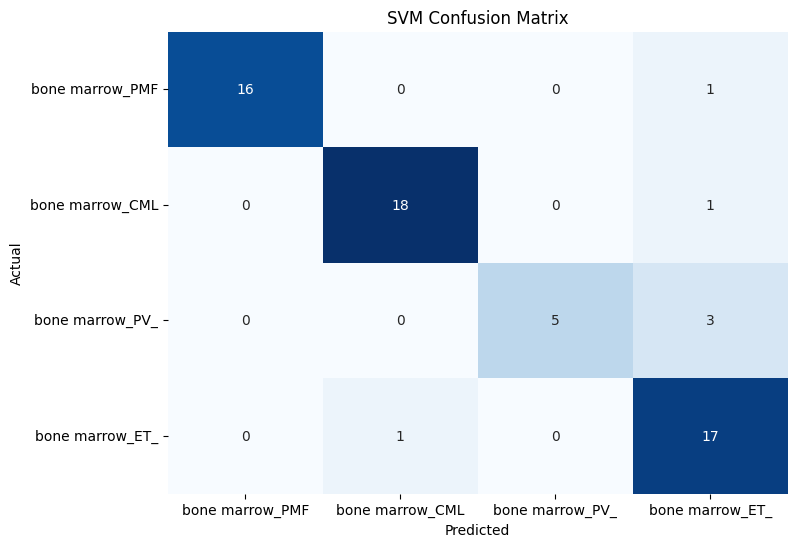

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


X = df1.iloc[:, :-1]  # Features
Y = df1.iloc[:, -1]   # Target
target_names = Y.unique()  # Class names

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(Y_test, svm_pred)
print(f"SVM Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(Y_test,svm_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, classification_report, confusion_matrix
)



KNN Classifier Accuracy: 0.7580645161290323

Classification Report:
                  precision    recall  f1-score   support

bone marrow_CML       1.00      0.76      0.87        17
bone marrow_ET_       0.71      0.79      0.75        19
bone marrow_PMF       1.00      0.38      0.55         8
bone marrow_PV_       0.64      0.89      0.74        18

       accuracy                           0.76        62
      macro avg       0.84      0.70      0.73        62
   weighted avg       0.81      0.76      0.75        62



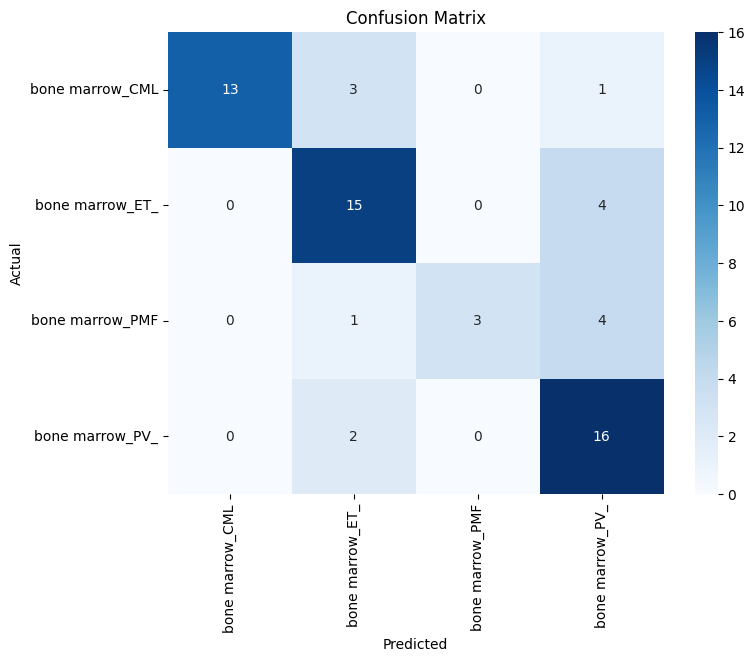


5-Fold Cross-Validation Accuracy: 0.7041251778093883


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance',metric='minkowski')

# Perform 10-fold cross-validation using StratifiedKFold to ensure balanced splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(knn, X_train, Y_train, cv=cv, scoring='accuracy')

# Train the classifier
knn.fit(X_train, Y_train)

# Make predictions
de_knn_pred = knn.predict(X_test)

# Evaluate the model
de_knn_accuracy = accuracy_score(Y_test, de_knn_pred)
print(f'KNN Classifier Accuracy: {de_knn_accuracy}')
de_knn_precision = precision_score(Y_test, de_knn_pred, average='macro')
de_knn_recall = recall_score(Y_test, de_knn_pred, average='macro')
de_knn_f1 = f1_score(Y_test, de_knn_pred, average='macro')
de_knn_mcc = matthews_corrcoef(Y_test, de_knn_pred)
de_knn_cv = cross_val_scores.mean()

# Generate the classification report
print("\nClassification Report:\n", classification_report(Y_test, de_knn_pred))



# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 10-Fold Cross-Validation Results
print(f"\n5-Fold Cross-Validation Accuracy: {cross_val_scores.mean()}")

autoencoder starts.......


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from torch.nn import Dropout

In [ ]:
num_epochs = 800

In [ ]:

y = df1['label'].values
X = df1.drop('label',axis = 1).values

In [ ]:
# 1. Data Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)

In [ ]:
!pip install torch_optimizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_optimizer as optim_lookahead

# Updated Autoencoder with LeakyReLU, BatchNorm, and no Dropout
class Autoencoder2(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),

            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(),

            nn.Linear(1024, input_dim),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiate and prepare for training
input_dim = X_train.shape[1]
autoencoder = Autoencoder2(input_dim)
criterion = nn.MSELoss()
#optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
base_optimizer = optim.AdamW(autoencoder.parameters(), lr=0.001)
optimizer = optim_lookahead.Lookahead(base_optimizer)  # Use Lo


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch_optimizer as optim_lookahead  # Import the optimizer library


# # Updated Autoencoder with LeakyReLU, BatchNorm, and no Dropout
# class Autoencoder2(nn.Module):
#     def __init__(self, input_dim):
#         super(Autoencoder2, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 1024),
#             nn.BatchNorm1d(1024),
#             nn.LeakyReLU(),

#             nn.Linear(1024, 512),
#             nn.BatchNorm1d(512),
#             nn.LeakyReLU(),

#             nn.Linear(512, 256),
#             nn.BatchNorm1d(256),
#             nn.LeakyReLU(),
#         )

#         self.decoder = nn.Sequential(
#             nn.Linear(256, 512),
#             nn.BatchNorm1d(512),
#             nn.LeakyReLU(),

#             nn.Linear(512, 1024),
#             nn.BatchNorm1d(1024),
#             nn.LeakyReLU(),

#             nn.Linear(1024, input_dim),
#         )

#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

# # Instantiate and prepare for training
# input_dim = X_train.shape[1]
# autoencoder = Autoencoder2(input_dim)
# criterion = nn.MSELoss()

# # Lookahead + AdamW
# base_optimizer = optim.AdamW(autoencoder.parameters(), lr=0.001)
# optimizer = optim_lookahead.Lookahead(base_optimizer)  # Use Lo


In [ ]:
# 3. Prepare DataLoader
data_tensor = torch.tensor(X_train, dtype=torch.float32)
dataloader = DataLoader(TensorDataset(data_tensor), batch_size=32, shuffle=True)

In [ ]:
# 4. Train Autoencoder
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        inputs = batch[0]
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataloader):.4f}")

# 5. Save Model
#torch.save(autoencoder.state_dict(), "autoencoder.pth")

torch.save(autoencoder, "autoencoder.pth")

Epoch [1/800], Loss: 21.8677
Epoch [2/800], Loss: 13.2720
Epoch [3/800], Loss: 7.5884
Epoch [4/800], Loss: 4.4765
Epoch [5/800], Loss: 2.5864
Epoch [6/800], Loss: 1.5177
Epoch [7/800], Loss: 0.9988
Epoch [8/800], Loss: 0.7896
Epoch [9/800], Loss: 0.7416
Epoch [10/800], Loss: 0.5662
Epoch [11/800], Loss: 0.5155
Epoch [12/800], Loss: 0.4693
Epoch [13/800], Loss: 0.4671
Epoch [14/800], Loss: 0.4669
Epoch [15/800], Loss: 0.4658
Epoch [16/800], Loss: 0.4422
Epoch [17/800], Loss: 0.4471
Epoch [18/800], Loss: 0.4737
Epoch [19/800], Loss: 0.4136
Epoch [20/800], Loss: 0.4195
Epoch [21/800], Loss: 0.4259
Epoch [22/800], Loss: 0.3993
Epoch [23/800], Loss: 0.3953
Epoch [24/800], Loss: 0.4091
Epoch [25/800], Loss: 0.4396
Epoch [26/800], Loss: 0.4075
Epoch [27/800], Loss: 0.3866
Epoch [28/800], Loss: 0.3752
Epoch [29/800], Loss: 0.3693
Epoch [30/800], Loss: 0.3702
Epoch [31/800], Loss: 0.3544
Epoch [32/800], Loss: 0.3408
Epoch [33/800], Loss: 0.3668
Epoch [34/800], Loss: 0.3662
Epoch [35/800], Loss:

In [ ]:
# 6. Load Trained Model

#model = Autoencoder(input_dim)
#model.load_state_dict(torch.load("autoencoder.pth"))

model = torch.load('autoencoder.pth', weights_only=False)

model

Autoencoder2(
  (encoder): Sequential(
    (0): Linear(in_features=5455, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
  )
  (decoder): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=512, out_features=1024, bias=True)
    (4): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5

In [ ]:
model.eval()

# 7. Encode Data
with torch.no_grad():
    X_train_encode = model.encoder(torch.tensor(X_train))
    X_test_encode = model.encoder(torch.tensor(X_test))

X_train_encode = X_train_encode.detach().numpy()
X_test_encode = X_test_encode.detach().numpy()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# 5.1 K-Nearest Neighbors (KNN)
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_train_encode, y_train)
y_pred_knn = knn_clf.predict(X_test_encode)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Classifier Accuracy: {accuracy_knn:.4f}")

# 5.2 Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
rf_clf.fit(X_train_encode, y_train)
y_pred_rf = rf_clf.predict(X_test_encode)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

# 5.3 Logistic Regression
log_reg_clf = LogisticRegression(max_iter=100000)
log_reg_clf.fit(X_train_encode, y_train)
y_pred_log_reg = log_reg_clf.predict(X_test_encode)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Classifier Accuracy: {accuracy_log_reg:.4f}")

KNN Classifier Accuracy: 0.8065
Random Forest Classifier Accuracy: 0.8548
Logistic Regression Classifier Accuracy: 0.9032



🎯 KNN Classifier Accuracy: 0.8065

📊 KNN Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       0.94      0.88      0.91        17
bone marrow_ET_       0.76      0.84      0.80        19
bone marrow_PMF       1.00      0.38      0.55         8
bone marrow_PV_       0.73      0.89      0.80        18

       accuracy                           0.81        62
      macro avg       0.86      0.75      0.76        62
   weighted avg       0.83      0.81      0.80        62



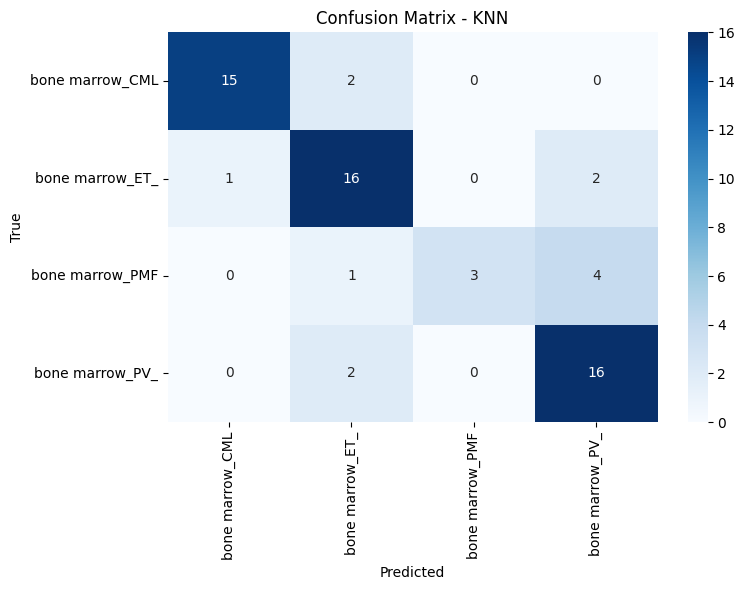

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train KNN
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train_encode, y_train)

# Predict
y_pred_knn = knn_clf.predict(X_test_encode)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\n🎯 KNN Classifier Accuracy: {accuracy_knn:.4f}")
print("\n📊 KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()



🎯 Random Forest Accuracy: 0.8548

📊 Random Forest Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       0.89      0.94      0.91        17
bone marrow_ET_       0.84      0.84      0.84        19
bone marrow_PMF       1.00      0.50      0.67         8
bone marrow_PV_       0.81      0.94      0.87        18

       accuracy                           0.85        62
      macro avg       0.89      0.81      0.82        62
   weighted avg       0.87      0.85      0.85        62



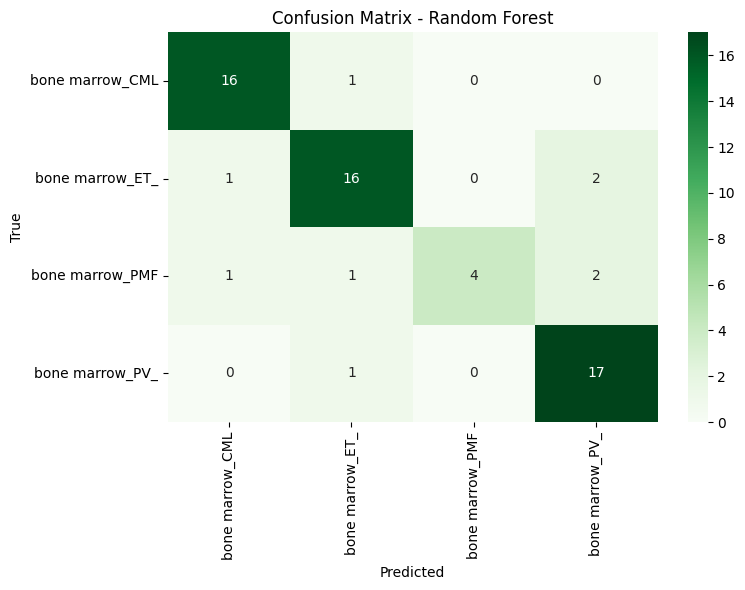

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=400,n_jobs=-1, random_state=42)
rf_clf.fit(X_train_encode, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test_encode)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n🎯 Random Forest Accuracy: {accuracy_rf:.4f}")
print("\n📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()



🎯 Logistic Regression Accuracy: 0.9032

📊 Logistic Regression Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       1.00      0.94      0.97        17
bone marrow_ET_       0.94      0.89      0.92        19
bone marrow_PMF       1.00      0.62      0.77         8
bone marrow_PV_       0.78      1.00      0.88        18

       accuracy                           0.90        62
      macro avg       0.93      0.87      0.88        62
   weighted avg       0.92      0.90      0.90        62



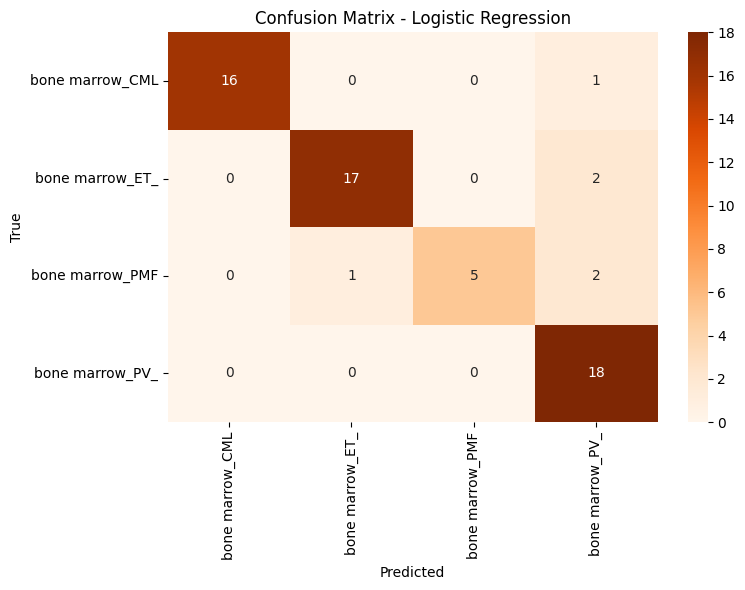

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_reg_clf = LogisticRegression(max_iter=100000)
log_reg_clf.fit(X_train_encode, y_train)

# Predict
y_pred_log_reg = log_reg_clf.predict(X_test_encode)

# Evaluate
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\n🎯 Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("\n📊 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
# 8. Train SVM Classifier
svm_clf = SVC(kernel = 'poly', C=100.0, gamma='scale', class_weight='balanced')  # You can tune C if needed
svm_clf.fit(X_train_encode, y_train)

# 9. Predict and Evaluate
y_pred = svm_clf.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy:.4f}")

SVM Classifier Accuracy: 0.8548



🎯 SVM Classifier Accuracy: 0.8548

📊 Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       1.00      0.88      0.94        17
bone marrow_ET_       0.84      0.84      0.84        19
bone marrow_PMF       0.83      0.62      0.71         8
bone marrow_PV_       0.77      0.94      0.85        18

       accuracy                           0.85        62
      macro avg       0.86      0.82      0.84        62
   weighted avg       0.86      0.85      0.85        62



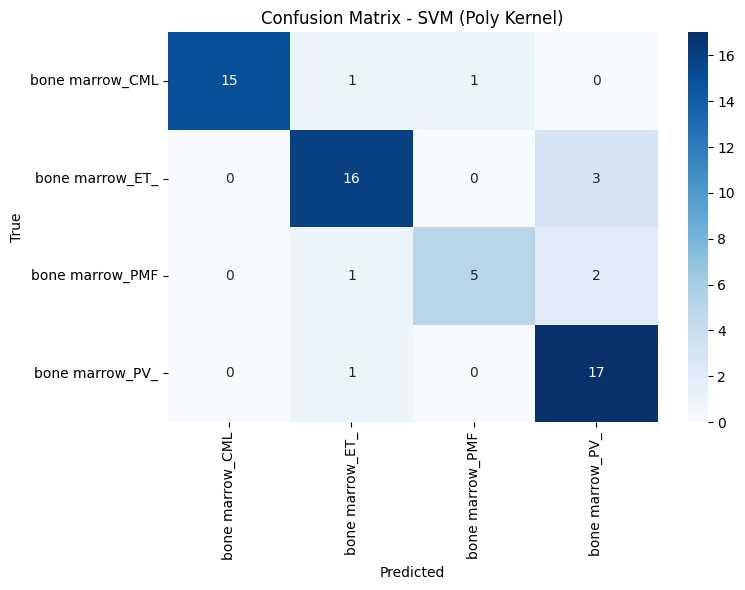

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 8. Train SVM Classifier
svm_clf = SVC(kernel='poly', C=100.0, gamma='scale', class_weight='balanced')
svm_clf.fit(X_train_encode, y_train)

# 9. Predict and Evaluate
y_pred = svm_clf.predict(X_test_encode)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 SVM Classifier Accuracy: {accuracy:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM (Poly Kernel)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Fitting 40 folds for each of 58 candidates, totalling 2320 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 24 members, which is less than n_splits=40.
  warnings.warn(


✅ Best Parameters: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
✅ Best Cross-Validation Accuracy: 0.8512

🎯 Test Accuracy: 0.8871

📊 Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       1.00      0.94      0.97        17
bone marrow_ET_       0.89      0.89      0.89        19
bone marrow_PMF       1.00      0.62      0.77         8
bone marrow_PV_       0.77      0.94      0.85        18

       accuracy                           0.89        62
      macro avg       0.92      0.85      0.87        62
   weighted avg       0.90      0.89      0.89        62



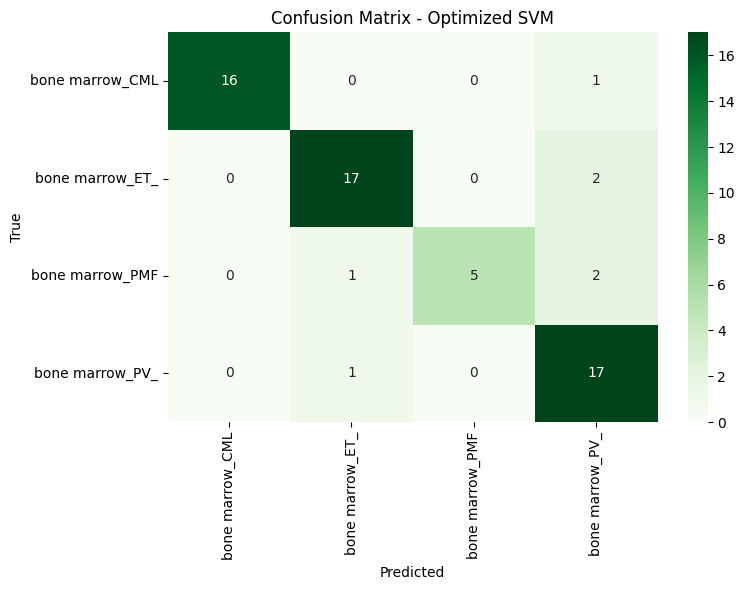

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define parameter grid properly separated for different kernels
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'class_weight': ['balanced']
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    },
    {
        'kernel': ['poly'],
        'C': [0.01, 0.1, 1, 10, 100],
        'degree': [1, 2, 3, 4],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    }
]

# Initialize base model
svm = SVC()

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=40,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train_encode, y_train)

# Print best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_encode)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Test Accuracy: {accuracy:.4f}")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Optimized SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Fitting 10 folds for each of 34 candidates, totalling 340 fits
✅ Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
✅ Best Cross-Validation Accuracy: 0.8386

🎯 Test Accuracy with Optimized SVM: 0.8871

📊 Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       1.00      0.94      0.97        17
bone marrow_ET_       0.89      0.89      0.89        19
bone marrow_PMF       1.00      0.62      0.77         8
bone marrow_PV_       0.77      0.94      0.85        18

       accuracy                           0.89        62
      macro avg       0.92      0.85      0.87        62
   weighted avg       0.90      0.89      0.89        62



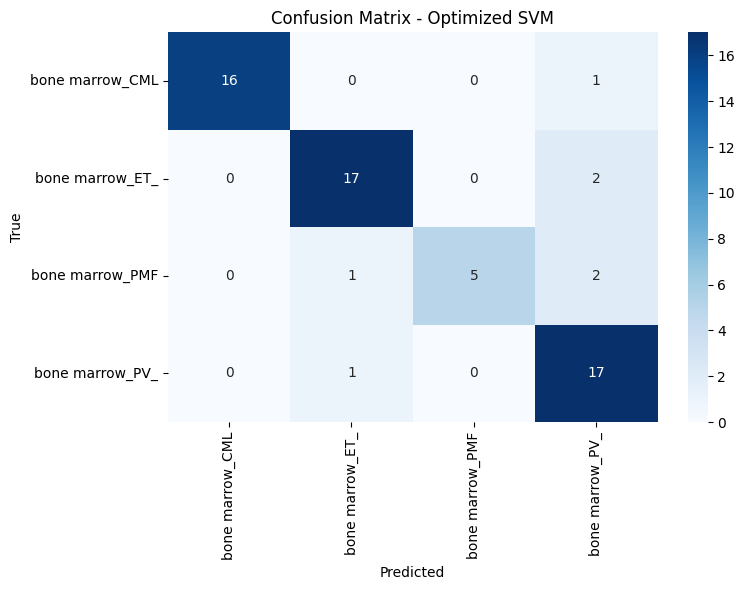

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define parameter grid (structured by kernel relevance)
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'class_weight': ['balanced']
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10, 100],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    }
]

# Initialize the base SVM model
svm = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_encode, y_train)

# Output the best parameters and best CV score
print("✅ Best Hyperparameters:", grid_search.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Get the best model
best_svm = grid_search.best_estimator_

# Predict on test set
y_pred = best_svm.predict(X_test_encode)

# Compute and display accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Test Accuracy with Optimized SVM: {test_accuracy:.4f}\n")

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Optimized SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Train Decision Tree on encoded features
dt_clf = DecisionTreeClassifier(
    criterion='gini',       # or 'entropy'
    max_depth=None,         # Set a value to avoid overfitting (e.g., 10)
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)
dt_clf.fit(X_train_encode, y_train)

# Step 2: Predict and evaluate
y_pred_dt = dt_clf.predict(X_test_encode)

# Step 3: Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier Accuracy: 0.6452
Confusion Matrix:
 [[14  0  2  1]
 [ 0 10  2  7]
 [ 0  0  5  3]
 [ 0  2  5 11]]
Classification Report:
                  precision    recall  f1-score   support

bone marrow_CML       1.00      0.82      0.90        17
bone marrow_ET_       0.83      0.53      0.65        19
bone marrow_PMF       0.36      0.62      0.45         8
bone marrow_PV_       0.50      0.61      0.55        18

       accuracy                           0.65        62
      macro avg       0.67      0.65      0.64        62
   weighted avg       0.72      0.65      0.66        62



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)
grid_dt.fit(X_train_encode, y_train)

print("Best Params:", grid_dt.best_params_)
print("Best CV Accuracy:", grid_dt.best_score_)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best CV Accuracy: 0.7213450292397661


Fitting 10 folds for each of 24 candidates, totalling 240 fits
✅ Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
✅ Best Cross-Validation Accuracy: 0.7213

🎯 Test Accuracy with Best Estimator: 0.6452

📊 Classification Report:
                 precision    recall  f1-score   support

bone marrow_CML       0.78      0.82      0.80        17
bone marrow_ET_       0.92      0.58      0.71        19
bone marrow_PMF       0.36      0.62      0.45         8
bone marrow_PV_       0.56      0.56      0.56        18

       accuracy                           0.65        62
      macro avg       0.65      0.65      0.63        62
   weighted avg       0.70      0.65      0.66        62



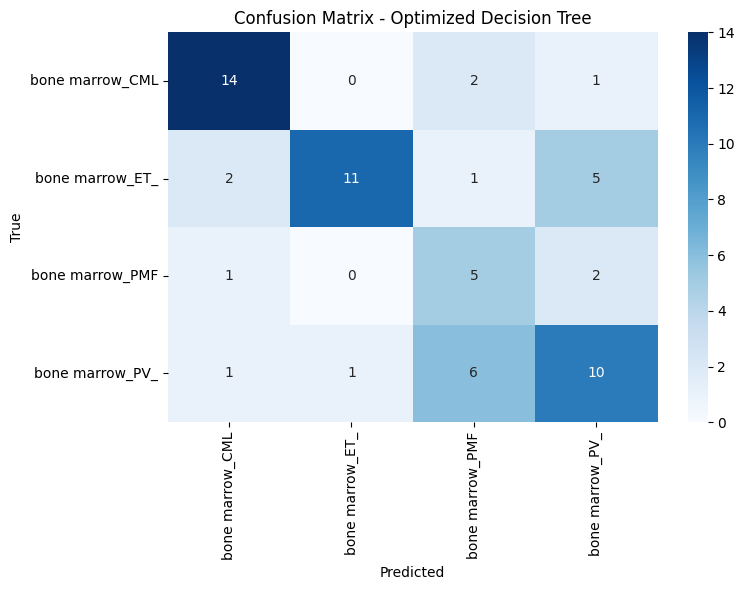

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV setup
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=10,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_dt.fit(X_train_encode, y_train)

# Output best parameters and cross-validated accuracy
print("✅ Best Hyperparameters:", grid_dt.best_params_)
print(f"✅ Best Cross-Validation Accuracy: {grid_dt.best_score_:.4f}")

# Use best estimator for prediction
best_dt = grid_dt.best_estimator_
y_pred = best_dt.predict(X_test_encode)

# Evaluate on test data
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Test Accuracy with Best Estimator: {test_accuracy:.4f}\n")

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Optimized Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
